In [ ]:
## Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #importing decision tree classifier
from sklearn.model_selection import train_test_split #importing train_test_split function
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing


company=pd.read_csv('Company_Data.csv')
company.head()



Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [ ]:
company.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company['Sales_Efficiency'] = company.Sales.map(lambda x: 'High' if x>8 else 'Low')


In [ ]:
company


Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US Sales_Efficiency  
0           17   Yes  Yes             High  
1           10   Yes  Yes             High  
2           12   Yes  Yes             High  
3           14   Yes  Yes              Low  
4           13   Yes   No              Low  
..         ...   ...  ...              ...  
395         14   Yes  Yes             High  
396         11    No  Yes              Low  
397         18   Yes  Yes              Low  
398         12   Yes  Yes              Low  
399         16   Yes  Yes             High  

[400 rows x 12 columns]

In [ ]:
df= pd.get_dummies(company,columns=['ShelveLoc','Urban','US'])


In [ ]:
df

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

    Sales_Efficiency  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  \
0               High              1               0                 0   
1               High              0               1                 0   
2               High              0               0                 1   
3                Low              0               0                 1   
4                Low              1               0                 0   
..               ...            ...             ...               ...   
395             High              0               1                 0   
396              Low              0               0                 1   
397              Low              0               0                 1   
398              Low              1               0                 0   
399             High              0               1                 0   

     Urban_No  Urban_Yes  US_No  US_Yes  
0           0          1      0       1  
1           0          1      0       1  
2           0          1      0       1  
3           0          1      0       1  
4           0          1      1       0  
..        ...        ...    ...     ...  
395         0          1      0       1  
396         1          0      0       1  
397         0          1      0       1  
398         0          1      0       1  
399         0          1      0       1  

[400 rows x 16 columns]

In [ ]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']


In [ ]:
X = df[feature_cols]
Y = df['Sales_Efficiency']



In [ ]:
X

CompPrice  Income  Advertising  Population  Price  Education  \
0          138      73           11         276    120         17   
1          111      48           16         260     83         10   
2          113      35           10         269     80         12   
3          117     100            4         466     97         14   
4          141      64            3         340    128         13   
..         ...     ...          ...         ...    ...        ...   
395        138     108           17         203    128         14   
396        139      23            3          37    120         11   
397        162      26           12         368    159         18   
398        100      79            7         284     95         12   
399        134      37            0          27    120         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        1       0  
..     ...     ...  
395      0       1  
396      0       1  
397      0       1  
398      0       1  
399      0       1  

[400 rows x 13 columns]

In [ ]:
Y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales_Efficiency, Length: 400, dtype: object

In [ ]:
Y.value_counts()


Low     236
High    164
Name: Sales_Efficiency, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=0)


In [ ]:
X_train


CompPrice  Income  Advertising  Population  Price  Education  \
336        138      35            6          60    143         18   
64         100      67           12         184    104         16   
55         143      81            5          60    154         18   
106        102      33            0         217    139         18   
300        116      78            1         158     99         11   
..         ...     ...          ...         ...    ...        ...   
323        107     105           18         428    103         12   
192        108      26            0         408     93         14   
117        145      53            0         507    119         12   
47         126      98            0         173    108         16   
172        104     102           13         123    110         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
336              1               0                 0         0          1   
64               0               0                 1         1          0   
55               0               0                 1         0          1   
106              0               0                 1         1          0   
300              0               0                 1         0          1   
..             ...             ...               ...       ...        ...   
323              0               0                 1         0          1   
192              0               0                 1         1          0   
117              0               0                 1         0          1   
47               1               0                 0         0          1   
172              0               1                 0         0          1   

     US_No  US_Yes  
336      1       0  
64       0       1  
55       0       1  
106      1       0  
300      0       1  
..     ...     ...  
323      0       1  
192      1       0  
117      1       0  
47       1       0  
172      0       1  

[320 rows x 13 columns]

In [ ]:
X_test


CompPrice  Income  Advertising  Population  Price  Education  \
132        125      87            9         232    136         10   
309        131     111           13          33     80         18   
341         98     120            0         268     93         10   
196        130      28            6         410    133         16   
246        120      56           20         266     90         18   
..         ...     ...          ...         ...    ...        ...   
14         107     117           11         148    118         18   
363        111      75            1         377    108         12   
304        123      98           12         408    134         10   
361        131      25           10         183    104         15   
329        100      54            9         433     89         12   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
132              0               1                 0         0          1   
309              1               0                 0         0          1   
341              0               0                 1         1          0   
196              1               0                 0         0          1   
246              1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
14               0               1                 0         0          1   
363              0               1                 0         0          1   
304              0               1                 0         0          1   
361              0               0                 1         1          0   
329              0               1                 0         0          1   

     US_No  US_Yes  
132      0       1  
309      0       1  
341      1       0  
196      0       1  
246      0       1  
..     ...     ...  
14       0       1  
363      1       0  
304      0       1  
361      0       1  
329      0       1  

[80 rows x 13 columns]

In [ ]:
Y_train



336     Low
64      Low
55      Low
106     Low
300    High
       ... 
323    High
192     Low
117    High
47      Low
172    High
Name: Sales_Efficiency, Length: 320, dtype: object

In [ ]:
Y_test


132    High
309    High
341     Low
196     Low
246     Low
       ... 
14     High
363    High
304    High
361    High
329    High
Name: Sales_Efficiency, Length: 80, dtype: object

In [ ]:
Y_test.value_counts()


Low     43
High    37
Name: Sales_Efficiency, dtype: int64

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

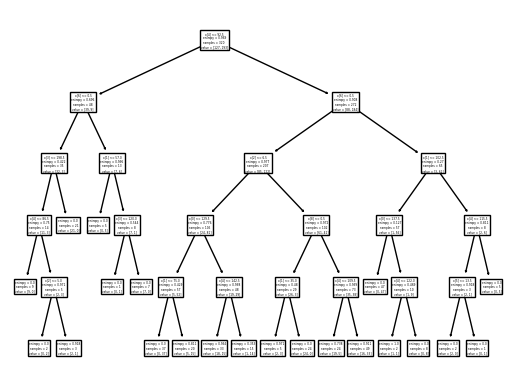

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

Low     44
High    36
dtype: int64

In [ ]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0             High  Low
Sales_Efficiency           
High                26   11
Low                 10   33

In [ ]:

# Accuracy
np.mean(preds==Y_test)


0.7375

In [ ]:
model.score(X_train,Y_train)


0.85625

In [ ]:
print("Accuracy", accuracy_score(Y_test,preds)*100)


Accuracy 73.75


# Building Decision Tree Classifier (CART) using Gini Criteria


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)


In [ ]:
model_gini.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=6)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==Y_test)



0.7375